# Landscape Color & Contrast Enhancement (OpenCV + Matplotlib)

In [1]:
import os
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show_image(img, title="Image"):
    plt.figure(figsize=(6,4))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
IMG_PATH = Path('view.jpg')
assert IMG_PATH.exists(), f'Input image not found at {IMG_PATH}'


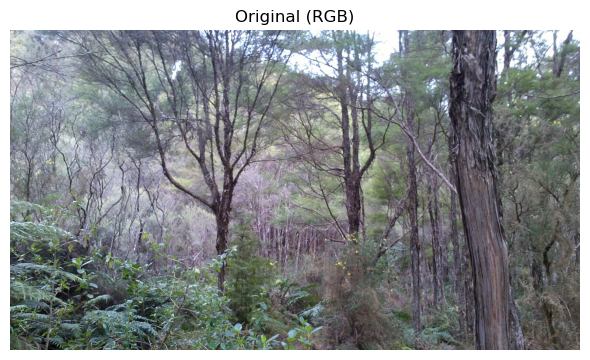

In [2]:
img_bgr = cv2.imread(str(IMG_PATH), cv2.IMREAD_COLOR)
if img_bgr is None:
    raise ValueError('Failed to read the image.')

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
show_image(img_rgb, title="Original (RGB)")


## 2) Contrast Enhancement (Histogram Equalization)

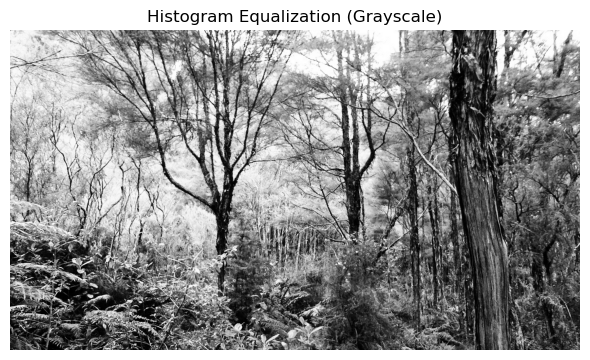

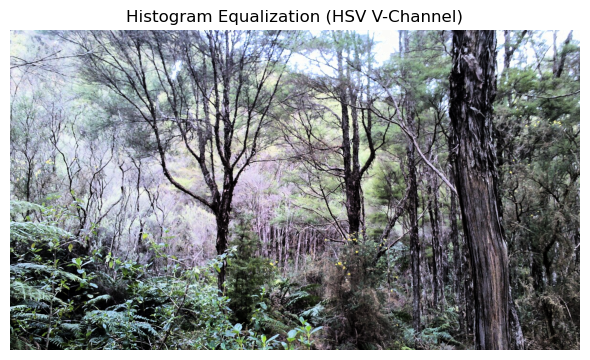

Saved: output_gray_equalized.png
Saved: output_vchannel_equalized.png


In [3]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
gray_eq = cv2.equalizeHist(gray)

gray_eq_rgb = cv2.cvtColor(gray_eq, cv2.COLOR_GRAY2RGB)

hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)
v_eq = cv2.equalizeHist(v)
hsv_eq = cv2.merge((h, s, v_eq))
rgb_v_eq = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)

show_image(gray_eq_rgb, title="Histogram Equalization (Grayscale)")
show_image(rgb_v_eq, title="Histogram Equalization (HSV V-Channel)")


out_gray_eq = Path('output_gray_equalized.png')
out_v_eq = Path('output_vchannel_equalized.png')
cv2.imwrite(str(out_gray_eq), cv2.cvtColor(gray_eq_rgb, cv2.COLOR_RGB2BGR))
cv2.imwrite(str(out_v_eq), cv2.cvtColor(rgb_v_eq, cv2.COLOR_RGB2BGR))

print(f"Saved: {out_gray_eq}")
print(f"Saved: {out_v_eq}")


## 3) Saturation Enhancement (HSV)

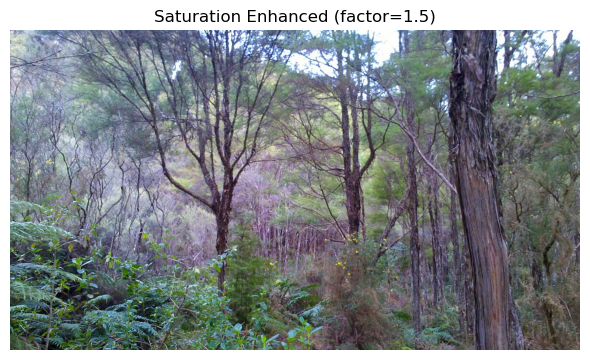

Saved: output_saturation_enhanced.png


In [4]:
factor = 1.5 
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV).astype(np.float32)
h, s, v = cv2.split(hsv)
s = np.clip(s * factor, 0, 255)

hsv_sat = cv2.merge((h, s, v)).astype(np.uint8)
rgb_sat = cv2.cvtColor(hsv_sat, cv2.COLOR_HSV2RGB)

show_image(rgb_sat, title=f"Saturation Enhanced (factor={factor})")

out_sat = Path('output_saturation_enhanced.png')
cv2.imwrite(str(out_sat), cv2.cvtColor(rgb_sat, cv2.COLOR_RGB2BGR))
print(f"Saved: {out_sat}")

## 4) Visual Comparison

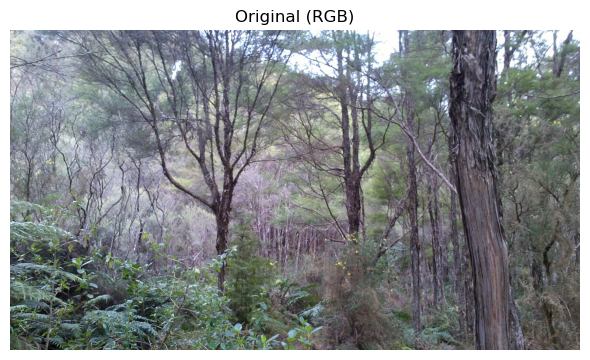

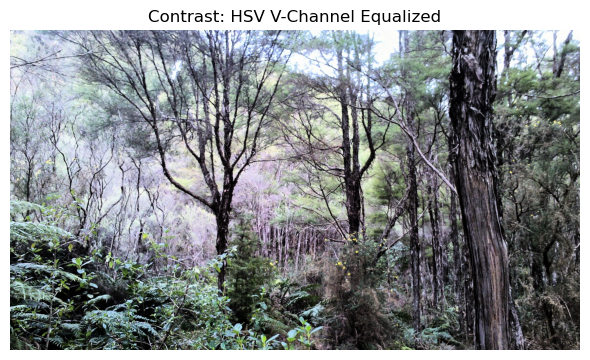

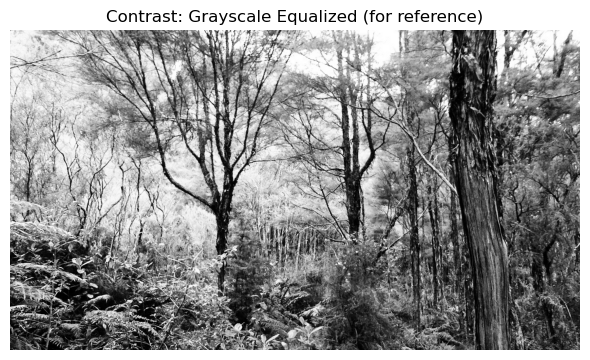

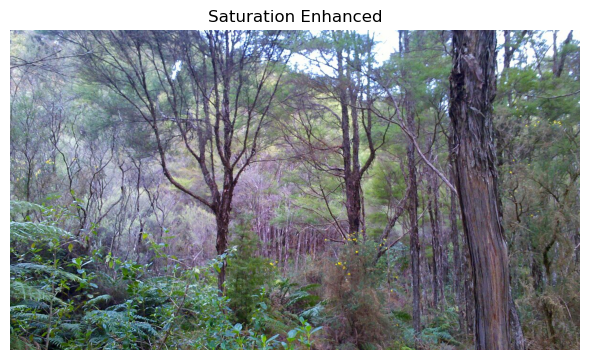

In [5]:
show_image(img_rgb, title="Original (RGB)")
show_image(rgb_v_eq, title="Contrast: HSV V-Channel Equalized")
show_image(gray_eq_rgb, title="Contrast: Grayscale Equalized (for reference)")
show_image(rgb_sat, title="Saturation Enhanced")